#
# Getting started with plotmap(), the [CliMAF](https://climaf.readthedocs.io) operator for plotting maps


- 1. [basic 2D map](#1.-Basic-plot)
- 2. [edit the titles](#2.-Edit-the-titles)
- 3. [change font sizes](#3.-Change-font-sizes)
- 4. [change color palette, isolines](#4.-Change-the-colorpalette-and-the-isolines)
- 5. [ocean view and set central longitude](#5.-Set-central-longitude-and-shade-land-with-grey)
- 6. [Raster type plot](#6-Raster-type-plot)
- 7. [Polar Stereographic projections](#7.-Polar-stereographic-views)
- 8. [Add the contours of a second field](#8.-Add-the-contours-of-a-second-field)
- 9. [Vectors of a wind field](#9.-Add-the-vectors-of-a-wind-field)
- 10. [Add a pattern (like statistical significance)](#10.-Add-a-pattern)
- 11. [Plot a region on an ORCA grid](#Plot-a-region-of-an-ORCA-grid)
- 13. [Various fancy projections available with 'proj'](#11.-Various-fancy-projections-available-with-proj)
    - 13.1 [the cool Satellite projection](#13.1-:-Satellite-projection)

## Import climaf

In [1]:
from climaf.api import *
clog('critical') # min verbosity = critical < warning < info < debug = max verbosity

python => 3.10.13 | packaged by conda-forge | (main, Oct 26 2023, 18:07:37) [GCC 12.3.0]
---
Required softwares to run CliMAF => you are using the following versions/installations:


CliMAF climaf_version = 3.0
CliMAF install => /home/ssenesi/climaf_installs/climaf_running
Cache directory set to : /data/ssenesi/climaf_cache (use $CLIMAF_CACHE if set) 
Cache directory for remote data set to : /data/ssenesi/climaf_cache/remote_data (use $CLIMAF_REMOTE_CACHE if set) 
Available macros read from ~/.climaf.macros are : []
error    : second argument ('curl_tau_atm') must be a script or operator, already declared


In [2]:
# When developing the script of a CliMAF operator, we may wish to systematically
# recompute the object we look at
# Redefining function cshow allows for that
def cshow(obj):
    climaf.api.cshow(obj, drop=True)

#  

## 0. Get a dataset

In [3]:
dat = ds(project='CMIP5', model='CNRM-CM5', experiment='historical', frequency='monthly', version='v20130101',
         period='1980-1982', variable='tos', realm='ocean' )
#dat = fds("/bdd/CMIP5/output/CNRM-CERFACS/CNRM-CM5/historical/mon/ocean/Omon/r1i1p1/v20130101/tos/tos_Omon_CNRM-CM5_historical_r1i1p1_198001-198912.nc")
summary(dat)

/bdd/CMIP5/output/CNRM-CERFACS/CNRM-CM5/historical/mon/ocean/Omon/r1i1p1/v20130101/tos/tos_Omon_CNRM-CM5_historical_r1i1p1_198001-198912.nc


{'project': 'CMIP5',
 'simulation': '',
 'variable': 'tos',
 'period': 1980-1982,
 'domain': 'global',
 'root': '/bdd',
 'model': 'CNRM-CM5',
 'table': '*',
 'experiment': 'historical',
 'realization': 'r1i1p1',
 'frequency': 'monthly',
 'realm': 'ocean',
 'version': 'v20130101'}

#  
## 1. Basic plot

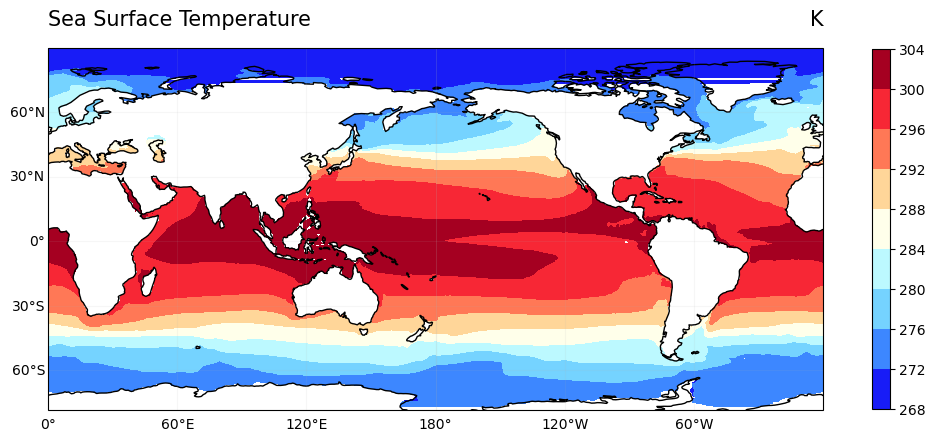

In [4]:
myplot = plotmap(time_average(dat))
cshow(myplot)

#  
## 2. Edit the titles

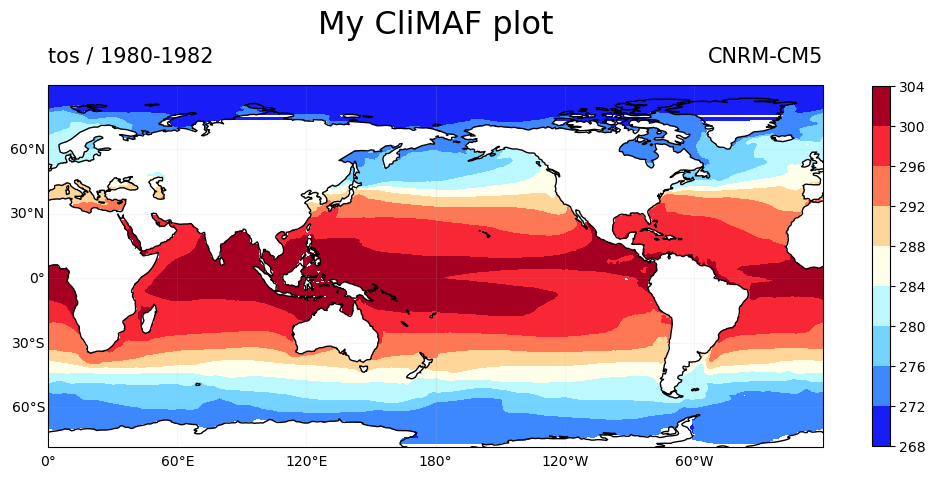

In [5]:
myplot = plotmap(time_average(dat), 
              title='My CliMAF plot',
              title_options={ 
                  'lefttitle':dat.variable + ' / ' + str(dat.period),
                  'righttitle':dat.model},
                )
cshow(myplot)

#  
## 3. Change font sizes

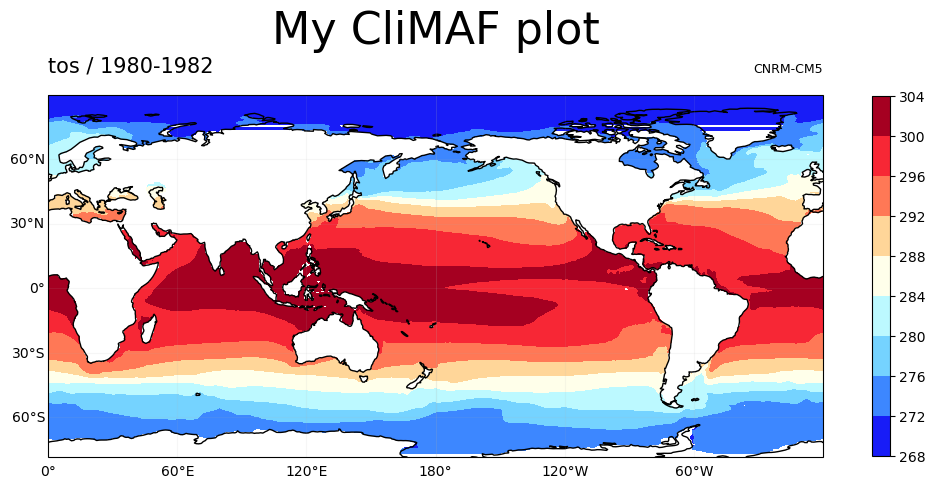

In [6]:
myplot = plotmap(time_average(dat), 
                 title='My CliMAF plot',
                 title_options={ 
                   'maintitlefontsize':30,
                   'lefttitle':dat.variable+ ' / ' + str(dat.period),
                   'righttitle':dat.model,
                   'righttitlefontsize': 9,
                 }
             )
cshow(myplot)

### Size of the Axis labels, colorbar labels, the fonts: see http://climaf.readthedocs.org/en/dev/scripts/plotmap.html

Give it a thought ....

#  
## 4. Change the colorpalette and the isolines

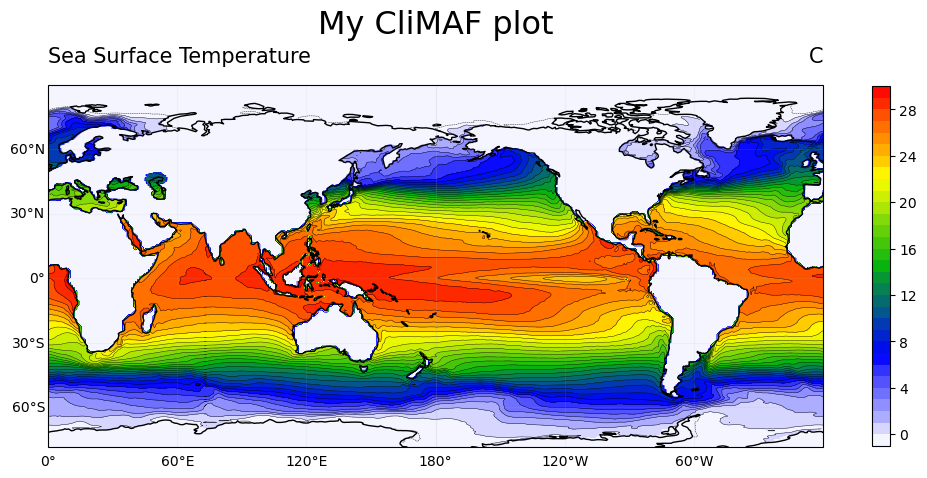

In [7]:
myplot = plotmap(time_average(dat),title='My CliMAF plot',
                  # -- Colorpalette
                  color='WhBlGrYeRe', 
                  # -- Add contours
                  contours=1,
                  # -- Add an offset to switch from K to degC
                  offset = -273.15, units = "C",
                  # -- Range and spacing
                  min=-1, max=30, delta=1,
              )
cshow(myplot)

#  
## 5. Set central longitude and shade land with grey

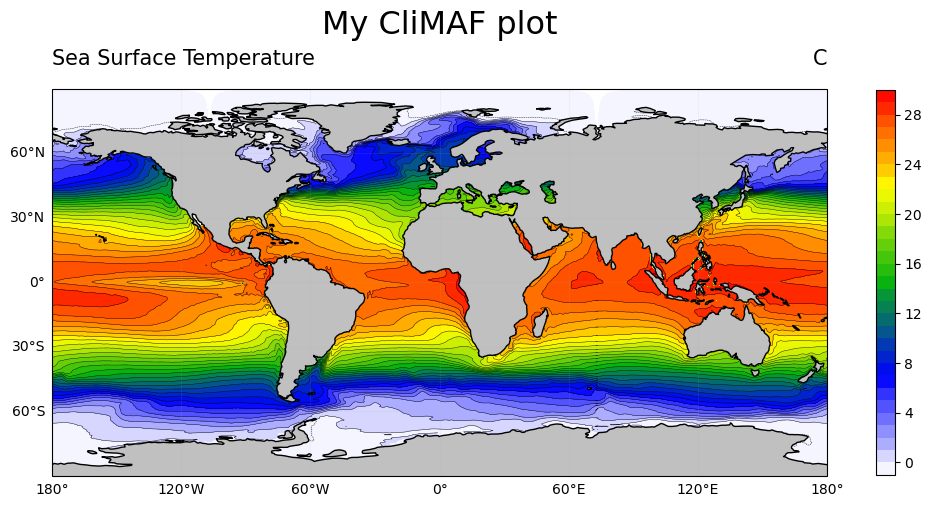

In [8]:
myplot = plotmap(time_average(dat),title='My CliMAF plot',
                  # -- Colorpalette
                  color='WhBlGrYeRe', 
                  # -- Add contours
                  contours=1,
                  # -- Add an offset to switch from K to degC
                  offset = -273.15, units = "C",
                  # -- Range and spacing
                  min=-1, max=30, delta=1,
                  # Shade land with grey
                  focus = 'ocean', 
                  # Change central longitude
                  proj = 'PlateCarree',
                  proj_options = {'central_longitude' : 0}
              )
cshow(myplot)

## 6 Raster type plot
### Change the plot engine for getting colored cells that match grid cells

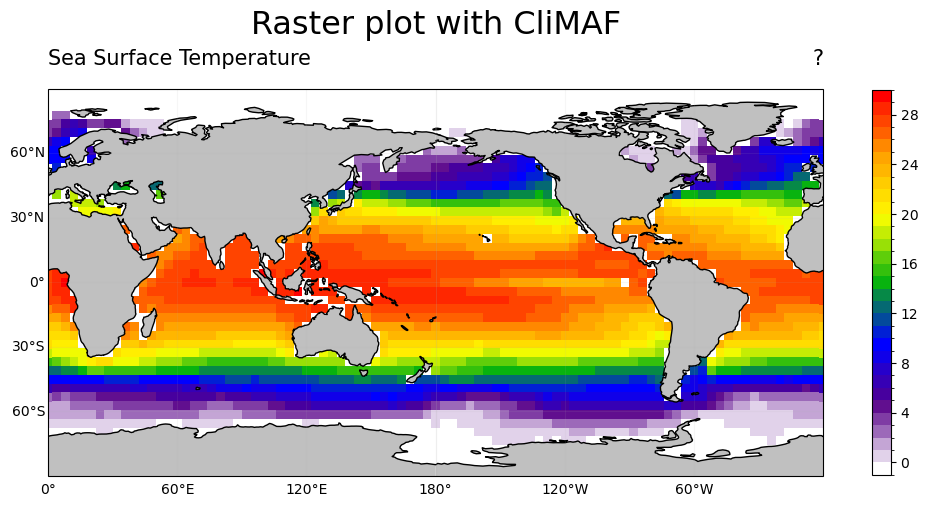

In [9]:
# --> Interpolate to coarser grid to see the raster
rdat=regridn(time_average(dat),cdogrid='r90x45')

myplot = plotmap(rdat,
              # -- Title
              title='Raster plot with CliMAF',
              # -- Colorpalette
              color='WhViBlGrYeOrRe',
              # -- Add an offset to switch from K to degC
              offset = -273.15,
              # -- Color ranges
              min=-1,max=30,delta=1,
              # -- Grey on lands
              focus='ocean',
              # -- Change cartopy/matplotlib plot engine
              clre='pcolormesh'
              )
cshow(myplot)

#  
## 7. Polar stereographic views

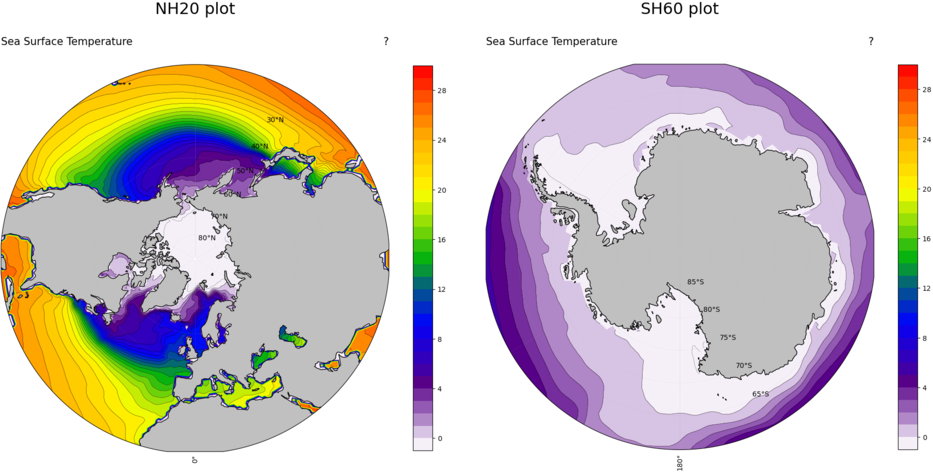

In [10]:
# --> Set proj to 'NH' or 'SH'; the two additionnal characters set the last latitude visible 

projNH = 'NH20'
myplotNH = plotmap(regridn(clim_average(dat,'ANM'),cdogrid='r360x180'),
              # -- Title
              title=projNH+' plot',
              # -- Colorpalette
              color='WhViBlGrYeOrRe',
              # -- And add an offset to switch from K to degC
              offset = -273.15,
              # -- Add contours
              contours=1,
              # -- Isolines
              min=-1,max=30,delta=1,
              # -- Grey on lands
              focus='ocean',
              # -- Northern Hemisphere projection
              proj=projNH,              
              )
projSH = 'SH60'
myplotSH = plotmap(regridn(clim_average(dat,'ANM'),cdogrid='r360x180'),
              # -- Title
              title=projSH+' plot',
              # -- Colorpalette
              color='WhViBlGrYeOrRe',
              # -- And add an offset to switch from K to degC
              offset = -273.15,
              # -- Add contours
              contours=1,
              # -- Isolines
              min=-1,max=30,delta=1,
              # -- Grey on lands
              focus='ocean',
              # -- Northern Hemisphere projection
              proj=projSH
              )
#cdrop(myplotNH); cdrop(myplotSH); cdrop(cpage(fig_lines=[[myplotNH,myplotSH]]))
iplot(cpage(fig_lines=[[myplotNH,myplotSH]]))

#  
## 8. Add the contours of a second field

In [11]:
# -- Get an auxillary field
aux = ds(project='CMIP5', model='CNRM-CM5', experiment='historical', frequency='monthly', version='v20130101',
         period='1980-2005', variable='sic')
summary(aux)

/bdd/CMIP5/output/CNRM-CERFACS/CNRM-CM5/historical/mon/seaIce/OImon/r1i1p1/v20130101/sic/sic_OImon_CNRM-CM5_historical_r1i1p1_185001-200512.nc


{'project': 'CMIP5',
 'simulation': '',
 'variable': 'sic',
 'period': 1980-2005,
 'domain': 'global',
 'root': '/bdd',
 'model': 'CNRM-CM5',
 'table': '*',
 'experiment': 'historical',
 'realization': 'r1i1p1',
 'frequency': 'monthly',
 'realm': '*',
 'version': 'v20130101'}

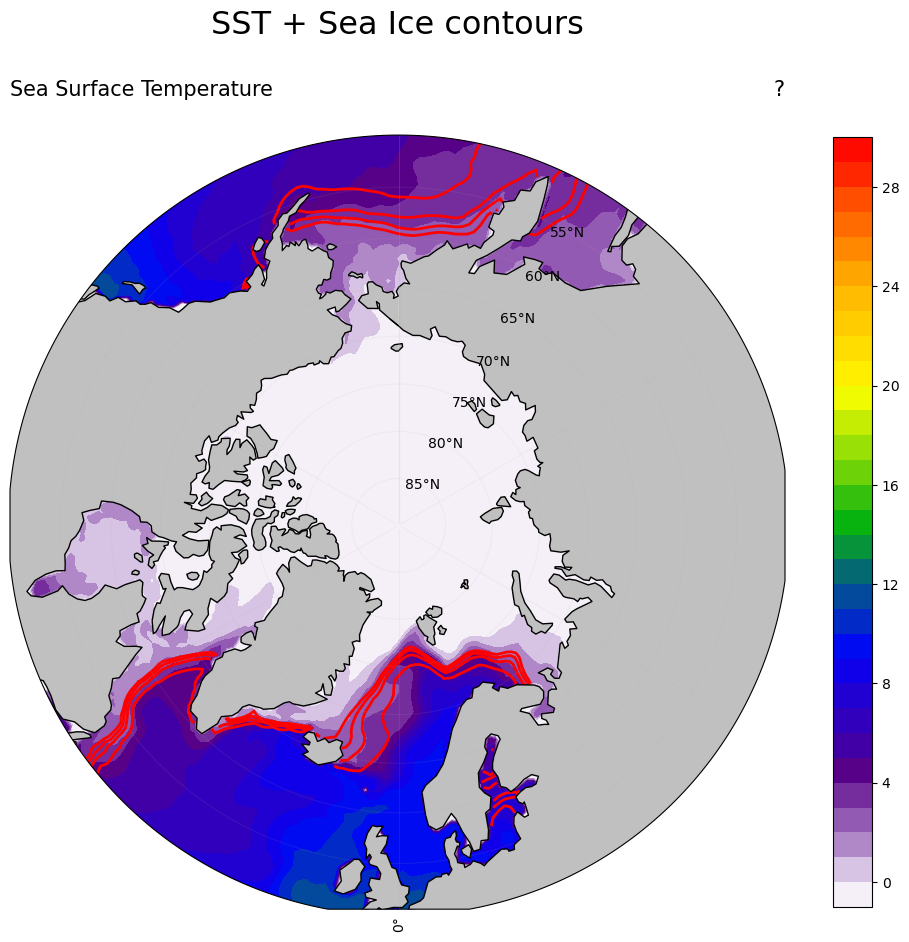

In [12]:
# --> Provide the auxillary field as a second argument
myplotNH = plotmap(time_average(dat),
              # -- Field for contours is provided as a second argument
              time_average(aux),
              # -- Specifiy contours (we can also use a python list)
              contours='1 5 10 15',
              # -- Handle options for the contoured field
              cnteo={'colors':'red','linewidths':2},
              # -- Title
              title='SST + Sea Ice contours',
              # -- Colorpalette
              color='WhViBlGrYeOrRe',
              # -- And add an offset to switch from K to degC
              offset = -273.15,
              # -- Color ranges
              min=-1,max=30,delta=1,
              # -- Grey on lands
              focus='ocean',
              # -- Northern Hemisphere projection
              proj='NH50',
              #proj_options={'central_longitude':45}
              )
cshow(myplotNH)

#  
## 9. Add the vectors of a wind field

In [13]:
tauu = ds(project='CMIP5', model='CNRM-CM5', experiment='historical', frequency='monthly', version='v20130101',
          period='1980-2005', variable='tauuo')
tauv = ds(project='CMIP5', model='CNRM-CM5', experiment='historical', frequency='monthly', version='v20130101',
          period='1980-2005', variable='tauvo')
summary(tauv)

/bdd/CMIP5/output/CNRM-CERFACS/CNRM-CM5/historical/mon/ocean/Omon/r1i1p1/v20130101/tauvo/tauvo_Omon_CNRM-CM5_historical_r1i1p1_198001-198912.nc
/bdd/CMIP5/output/CNRM-CERFACS/CNRM-CM5/historical/mon/ocean/Omon/r1i1p1/v20130101/tauvo/tauvo_Omon_CNRM-CM5_historical_r1i1p1_199001-199912.nc
/bdd/CMIP5/output/CNRM-CERFACS/CNRM-CM5/historical/mon/ocean/Omon/r1i1p1/v20130101/tauvo/tauvo_Omon_CNRM-CM5_historical_r1i1p1_200001-200512.nc


{'project': 'CMIP5',
 'simulation': '',
 'variable': 'tauvo',
 'period': 1980-2005,
 'domain': 'global',
 'root': '/bdd',
 'model': 'CNRM-CM5',
 'table': '*',
 'experiment': 'historical',
 'realization': 'r1i1p1',
 'frequency': 'monthly',
 'realm': '*',
 'version': 'v20130101'}

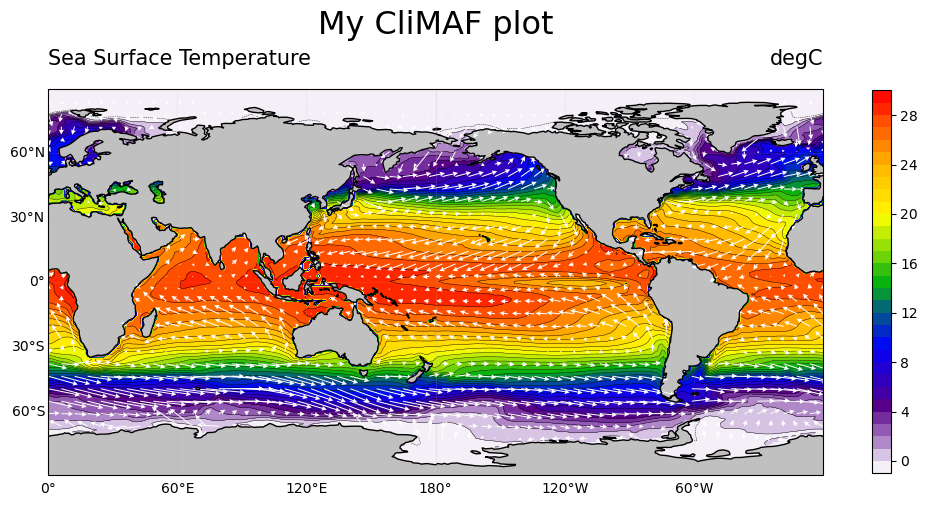

In [14]:
myplot = plotmap(regridn(time_average(dat),cdogrid='r360x180'),
                 # -- Provide dummy second argument (i.e. no field to contour)
                 "", 
                 # Vector components are third and fourth arguments
                 time_average(tauu),time_average(tauv),
                 # Vectors graphic settings
                 veco = {'color':'white', 
                         # A vector of 1 m/s will be 1/0.5 inches long
                         'scale':0.5, 'scale_units':'inches', 
                         # dimensions of arrow shaft and arrow head
                         'units':'dots', 'width':1, 'headwidth':5
                         # See also https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html
                        },
                 # How many vectors along each axis
                 vecg = [60 , 30],
                 # -- Title
                 title='My CliMAF plot',
                 # -- Colorpalette
                 color='WhViBlGrYeOrRe',
                 # -- Add contours
                 contours=1,
                 # -- And add an offset to switch from K to degC
                 offset = -273.15, units="degC",
                 # -- Color ranges
                 min=-1, max=30, delta=1,
                 # -- Grey on lands
                 focus='ocean'
                 )
cshow(myplot)

#  
## 10. Add a pattern

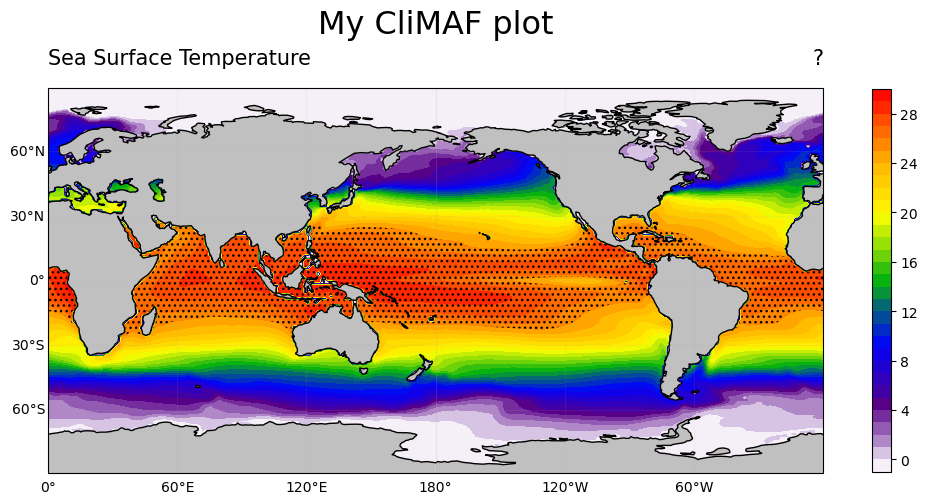

In [21]:
field = regridn(time_average(dat),cdogrid='r360x180')
field_with_ones_above_298 = ccdo(field, operator = "gec,298")
myplot = plotmap(field,
                 # Dummy values for contour and vector fields
                 None, None, None,
                 # Field for the pattern-shading (hatching)
                 field,
                 # -- Add an offset to switch from K to degC
                 offset = -273.15,
                 # -- Add the offset also to the pattern-shaded field
                 shdo = -273.15,
                 # Levels defining intervals which are patterned-filled
                 shdl = [ 25, 40],
                 # Pattern values for corresponding intervals. Character repetition drives density
                 shdh = ['...'],
                 # - Title
                 title='My CliMAF plot',
                 # -- Colorpalette
                 color='WhViBlGrYeOrRe',
                 # -- Color ranges
                 min=-1,max=30,delta=1,
                 # -- Grey on lands
                 focus='ocean'
                 )
cshow(myplot)

#
## Plot a region of an ORCA grid
### Need to regrid first

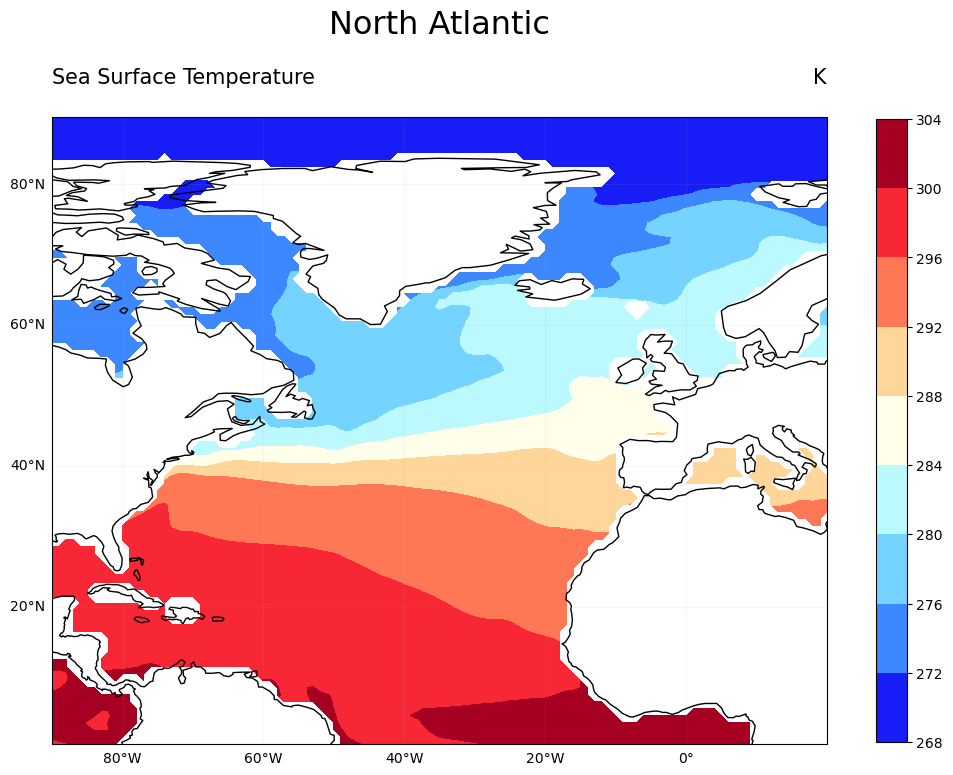

In [22]:
rgrd_dat = regridn(time_average(dat),cdogrid='r360x180')
myplot = plotmap(llbox(rgrd_dat,lonmin=-90,lonmax=20,latmin=0,latmax=90), 
                 title='North Atlantic', 
                 # Need to set a central_longitude so that region is not split
                 proj_options={'central_longitude':0})

cshow(myplot)

### 11. Various fancy projections available with proj
see all projections here: https://scitools.org.uk/cartopy/docs/latest/reference/crs.html

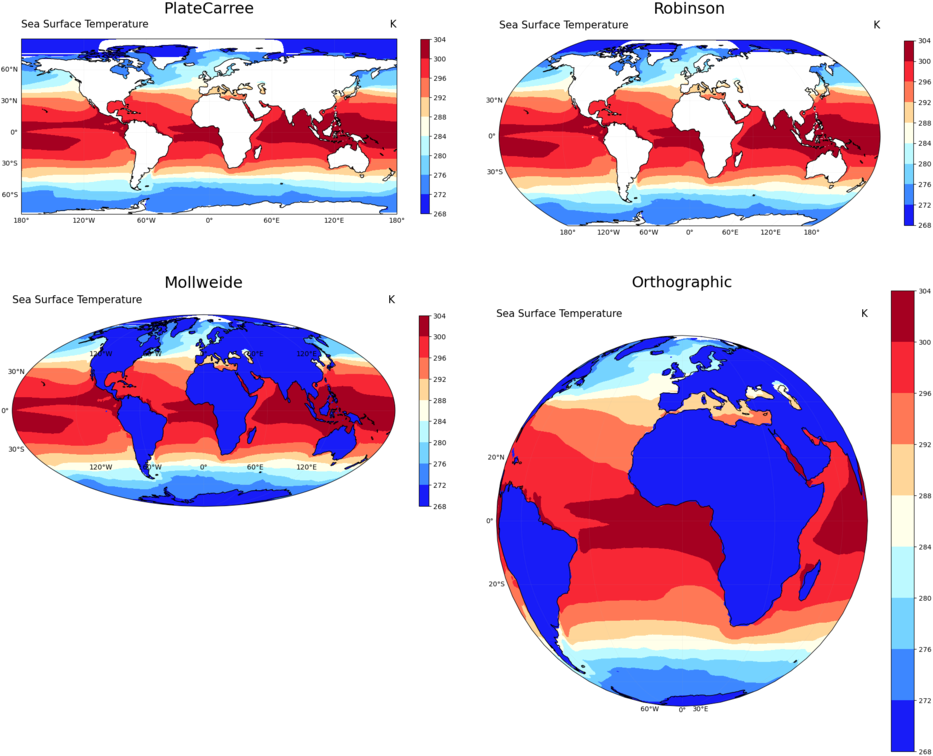

In [25]:
field = time_average(dat)

proj = 'PlateCarree'
p1 = plotmap(field, title=proj, proj=proj)
proj = 'Robinson'
p2 = plotmap(field, title=proj, proj=proj)
proj = 'Mollweide'
p3 = plotmap(field, title=proj, proj=proj)
proj = 'Orthographic'
p4 = plotmap(field, title=proj, proj=proj)
#cdrop(p1) ; cdrop(p2) ; cdrop(p3) ; cdrop(p4) ; cdrop(cpage(fig_lines = [[p1,p2],[p3,p4]]))
iplot(cpage(fig_lines = [[p1,p2],[p3,p4]]))

### 13.1 : Satellite projection

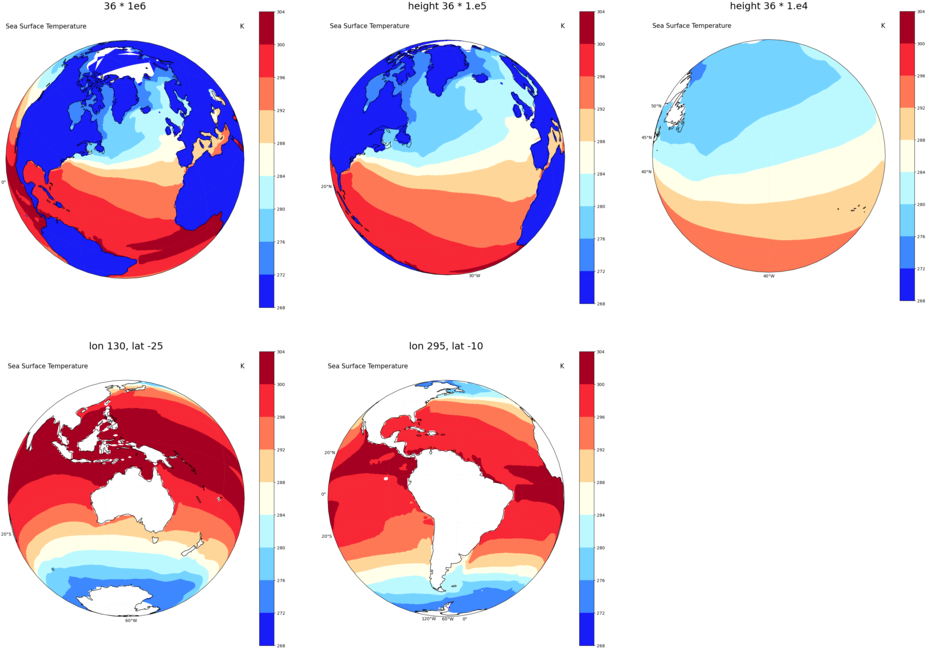

In [26]:
p1 = plotmap(field, proj='NearsidePerspective',
              title='36 * 1e6',
              proj_options=dict(central_longitude=-40, central_latitude=45, satellite_height=36*1.e6)
          )
p2 = plotmap(field, proj='NearsidePerspective',
              title='height 36 * 1.e5',
              proj_options=dict(central_longitude=-40, central_latitude=45, satellite_height=36*1.e5)
          )
p3 = plotmap(field, proj='NearsidePerspective',
              title='height 36 * 1.e4',
              proj_options=dict(central_longitude=-40, central_latitude=45, satellite_height=36*1.e4)
          )
p4 = plotmap(field, proj='NearsidePerspective',
              title='lon 130, lat -25',
              proj_options=dict(central_longitude=130, central_latitude=-25, satellite_height=36*1.e6)
          )
p5 = plotmap(field, proj='NearsidePerspective',
              title='lon 295, lat -10',
              proj_options=dict(central_longitude=295, central_latitude=-10, satellite_height=36*1.e6)
          )
#cdrop(p1); cdrop(p2); cdrop(p3); cdrop(p4); cdrop(p5); cdrop(cpage(fig_lines=[[p1,p2,p3],[p4,p5,None]]))
iplot(cpage(fig_lines=[[p1,p2,p3],[p4,p5,None]]))

## Questions?
### -> https://climaf.readthedocs.io/en/master/scripts/plotmap.html
### -> climaf@meteo.fr